In [1]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [109]:
from tqdm import tqdm

In [2]:
from plot_utils import *

In [9]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [3]:
from diffusion_utils import *

In [5]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# Load

In [95]:
params_list=[
({'nu':0,'de':1,},
{
'p_ctrl':[0.4,0.5,0.6],
# 'p_ctrl':[0.4,0.45,0.5,0.55,0.6],
'p_proj':np.linspace(0.0,0.0,1),
'sC':np.arange(100),
'sm':np.arange(500),
'L':[10,20,30]}
),
]

In [5]:
# for fixed_params,vary_params in params_list:
#     data_MPS_0_T_dict=generate_params(
#         fixed_params=fixed_params,
#         vary_params=vary_params,
#         fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_T.json',
#         # fn_dir_template='./MPS_0-1_C_m_x00',
#         fn_dir_template='../CT_MPS/MPS_0-1_C_m_x01_T',
#         # fn_dir_template='./MPS_0-1_C_m_x0',
#         input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {sC} {sm} ',
#         load_data=load_json,
#         filename='params_CT_MPS_0_C_m_T.txt',
#         filelist=None,
#         load=False,
#         data_dict=None,
#         # data_dict_file='xj({nu},{de})_C_m.pickle', 
#         # data_dict_file='xj({nu},{de})_C_m.json', 
#     )

generate_params: 100%|██████████| 450000/450000 [00:09<00:00, 47185.22it/s]


In [96]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_T.json',
        fn_dir_template='/MPS_0-1_C_m_x01_T',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        zip_fn='/home/jake/Data/MPS_0-1_C_m_x01_T.zip'  
    )
df_MPS_0_T_DW=convert_pd(data_MPS_0_T_DW_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj',])

generate_params: 100%|██████████| 450000/450000 [04:54<00:00, 1529.86it/s]


In [11]:
data=df_MPS_0_T_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC')

single=data.xs(0,level='sm').loc['DW2']['observations']-data.xs(0,level='sm').loc['DW1']['observations']**2

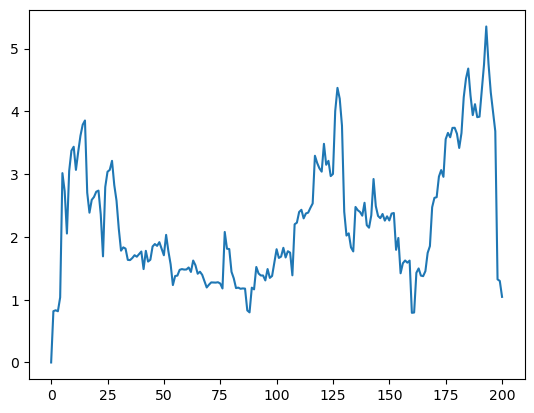

In [12]:
plt.plot(single)

# artistic plot

In [268]:
L=30
p=0.6
data=df_MPS_0_T_DW.xs(L,level='L').xs(p,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC')

single=[data.xs(sm,level='sm').loc['DW1']['observations'] for sm in range((params_list[0][1]['sm']).shape[0])]


(0.0, 1890.0)

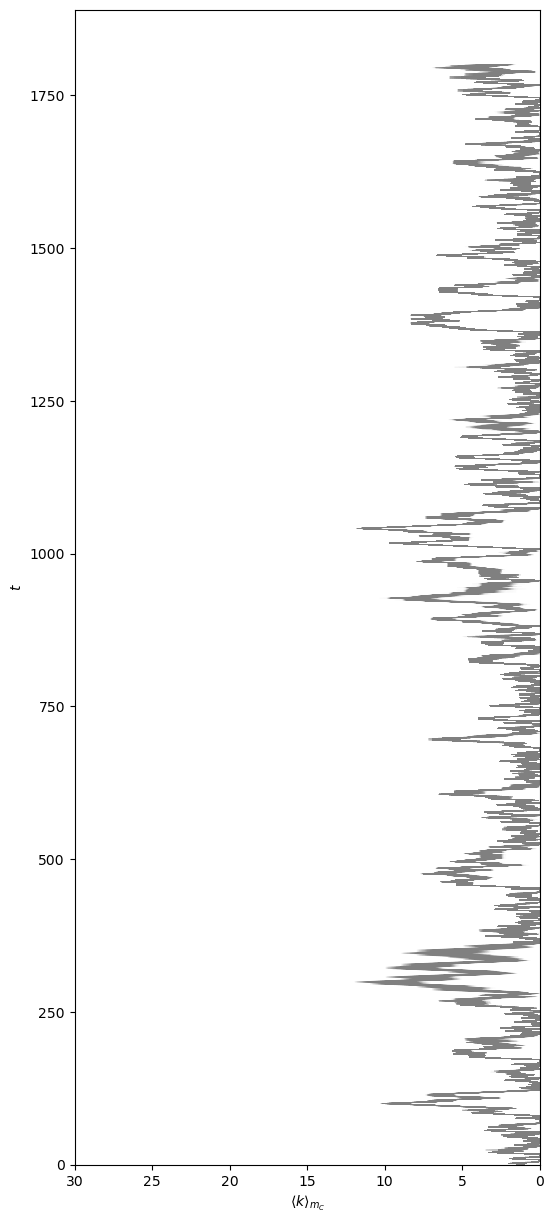

In [269]:
fig,ax=plt.subplots(figsize=(6,15))
for i in range((params_list[0][1]['sm']).shape[0]):
    ax.plot(single[i],np.arange(single[i].shape[0]),color='gray',alpha=0.05,linewidth=0.5)
ax.set_ylabel('$t$')
ax.set_xlabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(L,0)
ax.set_ylim(0,None)

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 $')

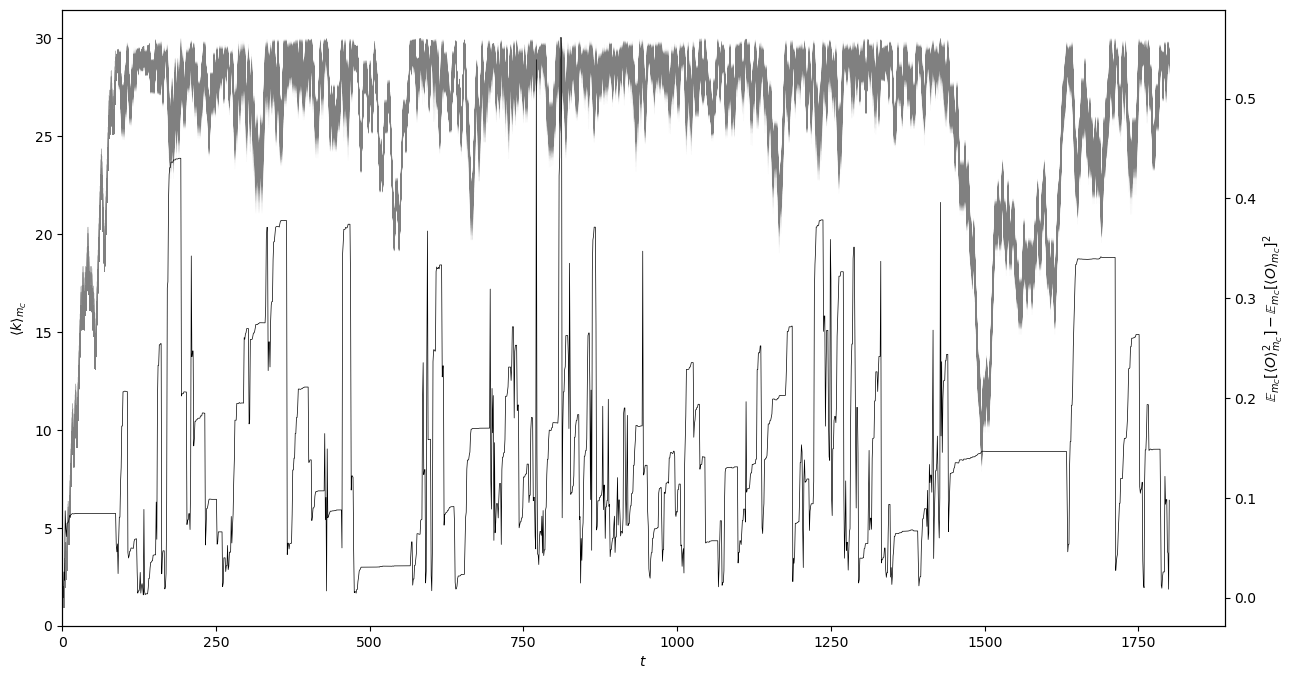

In [94]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
# for i in range(100):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,None)
ax.set_ylim(0,None)

ax2=ax.twinx()
ax2.plot(np.array(single).var(axis=0),color='black',linewidth=.5)
ax2.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 $')

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 $')

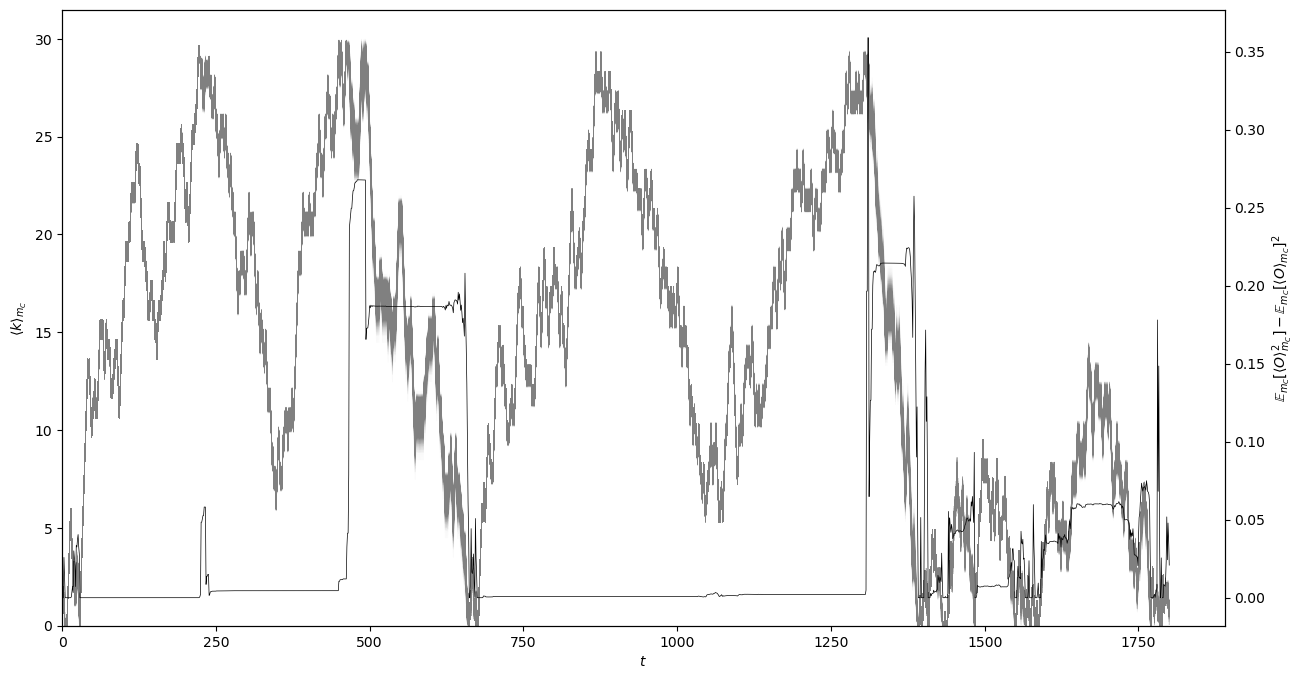

In [92]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
# for i in range(100):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,None)
ax.set_ylim(0,None)

ax2=ax.twinx()
ax2.plot(np.array(single).var(axis=0),color='black',linewidth=.5)
ax2.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 $')

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 $')

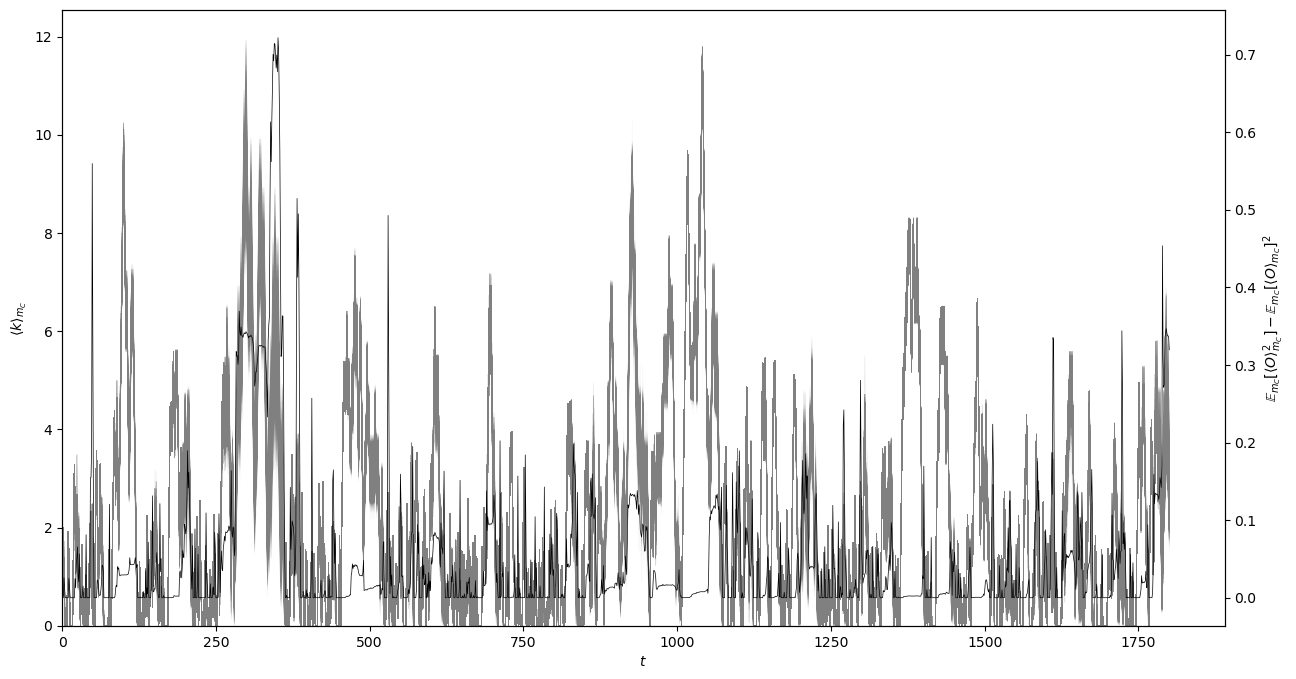

In [90]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
# for i in range(100):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,None)
ax.set_ylim(0,None)

ax2=ax.twinx()
ax2.plot(np.array(single).var(axis=0),color='black',linewidth=.5)
ax2.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 $')

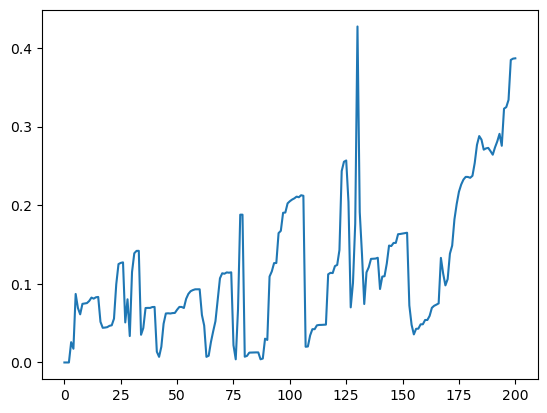

In [76]:
plt.plot(np.array(single).var(axis=0))

# QuVar of FDW

In [169]:
def qvar_dw(df, L,p_ctrl,sC):
    data=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0,level='p_proj').xs(sC,level='sC')
    single=np.array([data.xs(sm,level='sm').loc['DW2']['observations']-data.xs(sm,level='sm').loc['DW1']['observations']**2 for sm in range((params_list[0][1]['sm']).shape[0])])
    return single.mean(axis=0)

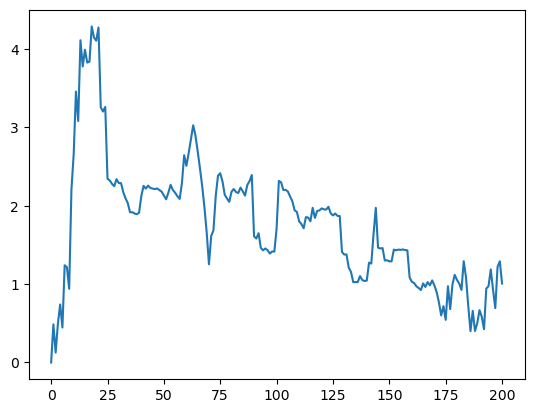

In [170]:
plt.plot(qvar_dw(df_MPS_0_T_DW,L=10,p_ctrl=0.4,sC=3))

In [172]:
qvar_dw_dict={}
qvar_dw_sem_dict={}
for p in tqdm(params_list[0][1]['p_ctrl']):
    for L in params_list[0][1]['L']:
        print(p,L)
        sC_qvar_dw=[qvar_dw(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in np.arange((params_list[0][1]['sC']).shape[0])]
        qvar_dw_dict[(p,L)]=np.mean(sC_qvar_dw,axis=0)
        qvar_dw_sem_dict[(p,L)]=np.std(sC_qvar_dw,axis=0)/np.sqrt((params_list[0][1]['sC']).shape[0]*(params_list[0][1]['sm']).shape[0])
        

  0%|          | 0/3 [00:00<?, ?it/s]

0.4 10
0.4 20
0.4 30


 33%|███▎      | 1/3 [02:13<04:27, 133.62s/it]

0.5 10
0.5 20
0.5 30


 67%|██████▋   | 2/3 [04:29<02:14, 134.79s/it]

0.6 10
0.6 20
0.6 30


100%|██████████| 3/3 [06:44<00:00, 134.73s/it]


In [242]:
qvar_dw_dict[(p,L)]-qvar_dw_sem_dict[(p,L)]
qvar_dw_dict[(p,L)]+qvar_dw_sem_dict[(p,L)]

array([8.57005046e-16, 2.28776519e-01, 3.25410041e-01, ...,
       7.13355420e-01, 6.90708619e-01, 7.40923539e-01])

Text(0, 0.5, '$\\mathbb{E}_C\\mathbb{E}_{m_C}[ \\langle {O^2}\\rangle_{m_C} -\\langle{O}\\rangle_{m_C}^2 ] $')

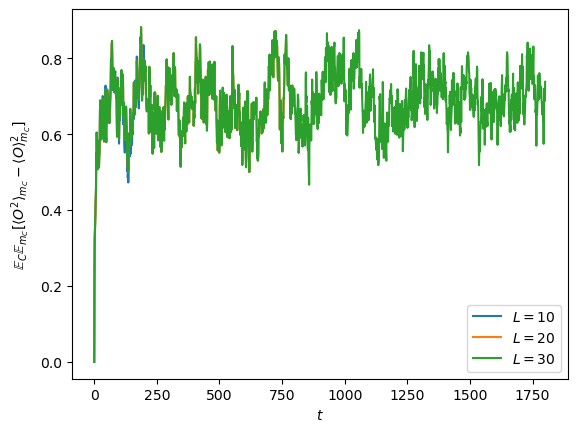

In [245]:
fig, ax = plt.subplots()
p=0.6
for L in params_list[0][1]['L']:
    x=np.arange(qvar_dw_dict[(p,L)].shape[0])
    ax.plot(qvar_dw_dict[(p,L)],label=rf'$L={L}$',alpha=1)
    ax.fill_between(x, qvar_dw_dict[(p,L)]-qvar_dw_sem_dict[(p,L)], qvar_dw_dict[(p,L)]+qvar_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C\mathbb{E}_{m_C}[ \langle {O^2}\rangle_{m_C} -\langle{O}\rangle_{m_C}^2 ] $')

Text(0, 0.5, '$\\mathbb{E}_C\\mathbb{E}_{m_C}[ \\langle {O^2}\\rangle_{m_C} -\\langle{O}\\rangle_{m_C}^2 ] $')

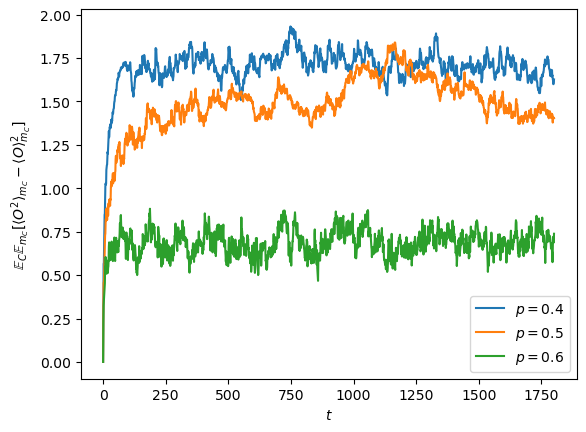

In [180]:
fig, ax= plt.subplots()
L=30
for p in params_list[0][1]['p_ctrl']:
    x=np.arange(qvar_dw_dict[(p,L)].shape[0])
    ax.plot(qvar_dw_dict[(p,L)],label=rf'$p={p}$',alpha=1)
    ax.fill_between(x, qvar_dw_dict[(p,L)]-qvar_dw_sem_dict[(p,L)], qvar_dw_dict[(p,L)]+qvar_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C\mathbb{E}_{m_C}[ \langle {O^2}\rangle_{m_C} -\langle{O}\rangle_{m_C}^2 ] $')

# Fluctuations averaged over circuit

In [98]:
def trajvar(df,L,p_ctrl,sC):
    data=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(sC,level='sC')

    single=[data.xs(sm,level='sm').loc['DW1']['observations'] for sm in range((params_list[0][1]['sm']).shape[0])]

    return np.array(single).var(axis=0)

In [99]:
sC_traj_var_dw=[trajvar(df_MPS_0_T_DW,L=10,p_ctrl=0.4,sC=sC) for sC in range((params_list[0][1]['sC']).shape[0])]

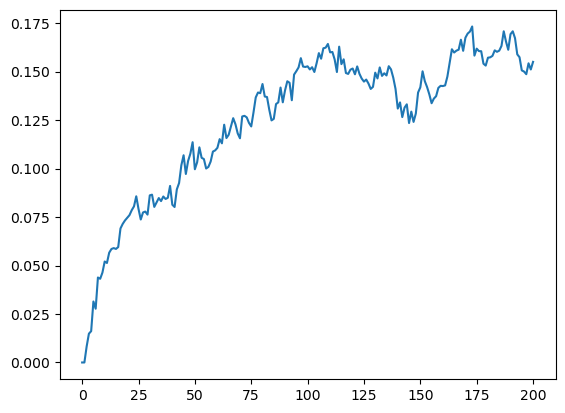

In [102]:
plt.plot(np.mean(sC_traj_var_dw,axis=0))

In [133]:
traj_var_dw_dict={}
traj_var_dw_sem_dict={}
for p in tqdm(params_list[0][1]['p_ctrl']):
    for L in params_list[0][1]['L']:
        print(p,L)
        sC_traj_var_dw=[trajvar(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in range((params_list[0][1]['sC']).shape[0])]
        traj_var_dw_dict[(p,L)], traj_var_dw_sem_dict[(p,L)]=np.mean(sC_traj_var_dw,axis=0), np.std(sC_traj_var_dw,axis=0)/np.sqrt((params_list[0][1]['sC']).shape[0])

  0%|          | 0/3 [00:00<?, ?it/s]

0.4 10
0.4 20
0.4 30


 33%|███▎      | 1/3 [00:46<01:32, 46.46s/it]

0.5 10
0.5 20
0.5 30


 67%|██████▋   | 2/3 [01:36<00:48, 48.85s/it]

0.6 10
0.6 20
0.6 30


100%|██████████| 3/3 [02:24<00:00, 48.14s/it]


In [137]:
traj_var_dw_dict[(0.4,L)].shape

(201,)

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

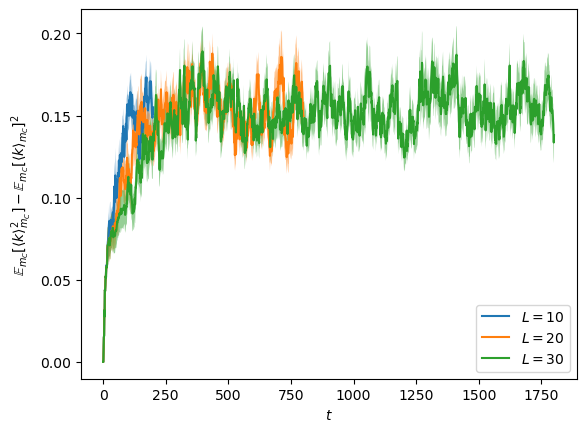

In [145]:
fig,ax=plt.subplots()
p=0.4
for L in params_list[0][1]['L']:
    x=np.arange(traj_var_dw_dict[(p,L)].shape[0])
    ax.plot(traj_var_dw_dict[(p,L)],label=rf'$L={L}$',alpha=1)
    ax.fill_between(x, traj_var_dw_dict[(p,L)]-traj_var_dw_sem_dict[(p,L)], traj_var_dw_dict[(p,L)]+traj_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

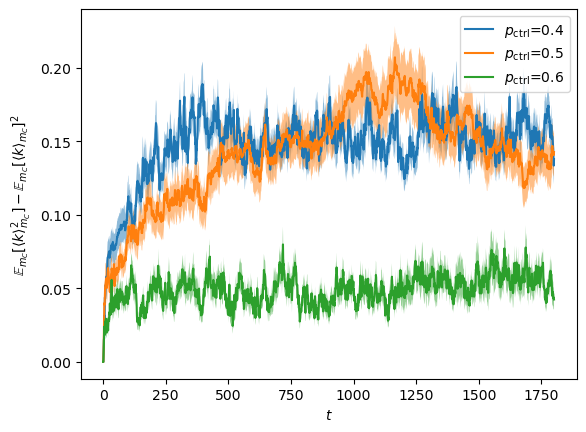

In [144]:
fig,ax=plt.subplots()
L=30
for p in params_list[0][1]['p_ctrl']:
    x=np.arange(traj_var_dw_dict[(p,L)].shape[0])
    ax.plot(traj_var_dw_dict[(p,L)],label=rf'$p_{{\rm{{ctrl}}}}$={p}',alpha=1)
    ax.fill_between(x, traj_var_dw_dict[(p,L)]-traj_var_dw_sem_dict[(p,L)], traj_var_dw_dict[(p,L)]+traj_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

# circuit_var 

In [201]:
def circ_var_dw(df,L,p_ctrl,sC):
    data=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0,level='p_proj').xs(sC,level='sC')
    return np.stack(data.xs('DW1')['observations'].values).mean(axis=0)

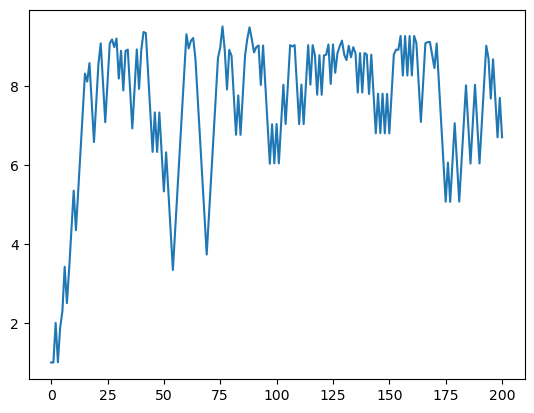

In [203]:
plt.plot(circ_var_dw(df_MPS_0_T_DW,L=10,p_ctrl=0.4,sC=0))

In [228]:
circ_var_dw_dict={}
circ_var_dw_sem_dict={}
for p in tqdm(params_list[0][1]['p_ctrl']):
    for L in params_list[0][1]['L']:
        print(p,L)
        sC_circ_var_dw=[circ_var_dw(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in np.arange((params_list[0][1]['sC']).shape[0])]
        sC_circ_var=np.var(sC_circ_var_dw,axis=0)
        sC_circ_var_sem=sC_circ_var*np.sqrt(2/((params_list[0][1]['sC']).shape[0]-1))
        circ_var_dw_dict[p,L],circ_var_dw_sem_dict[p,L] = sC_circ_var, sC_circ_var_sem


  0%|          | 0/3 [00:00<?, ?it/s]

0.4 10
0.4 20
0.4 30


 33%|███▎      | 1/3 [00:19<00:38, 19.25s/it]

0.5 10
0.5 20
0.5 30


 67%|██████▋   | 2/3 [00:41<00:21, 21.14s/it]

0.6 10
0.6 20
0.6 30


100%|██████████| 3/3 [01:01<00:00, 20.53s/it]


Text(0, 0.5, '$\\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 ] - \\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ] ]^2$')

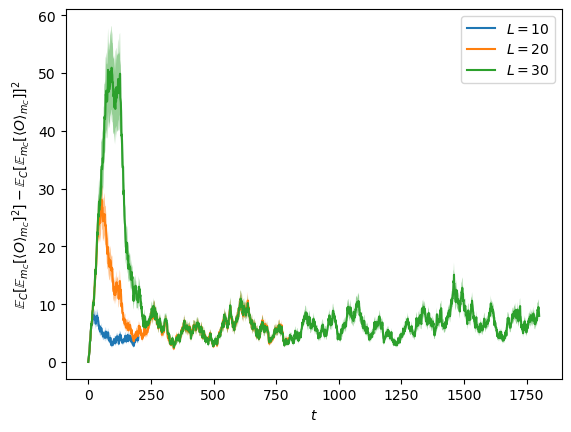

In [231]:
fig,ax=plt.subplots()
p=0.4
for L in params_list[0][1]['L']:
    x=np.arange(circ_var_dw_dict[(p,L)].shape[0])
    ax.plot(circ_var_dw_dict[(p,L)],label=rf'$L={L}$',alpha=1)
    ax.fill_between(x, circ_var_dw_dict[(p,L)]-circ_var_dw_sem_dict[(p,L)], circ_var_dw_dict[(p,L)]+circ_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 ] - \mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ] ]^2$')

Text(0, 0.5, '$\\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 ] - \\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ] ]^2$')

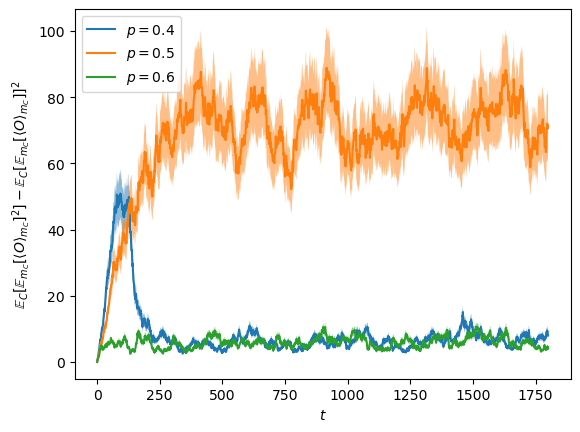

In [235]:
fig,ax=plt.subplots()
L=30
for p in params_list[0][1]['p_ctrl']:
    x=np.arange(circ_var_dw_dict[(p,L)].shape[0])
    ax.plot(circ_var_dw_dict[(p,L)],label=rf'$p={p}$',alpha=1)
    ax.fill_between(x, circ_var_dw_dict[(p,L)]-circ_var_dw_sem_dict[(p,L)], circ_var_dw_dict[(p,L)]+circ_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 ] - \mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ] ]^2$')

In [10]:
zz=load_json('MPS_(0,1)_L10_pctrl0.500_pproj0.000_sC0_sm0_x01_DW_T.json')

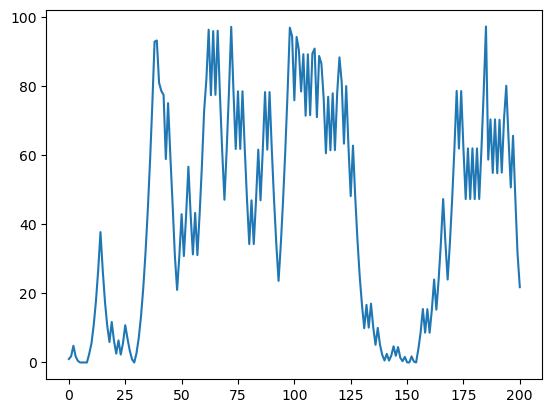

In [13]:
plt.plot(zz['DW2'])

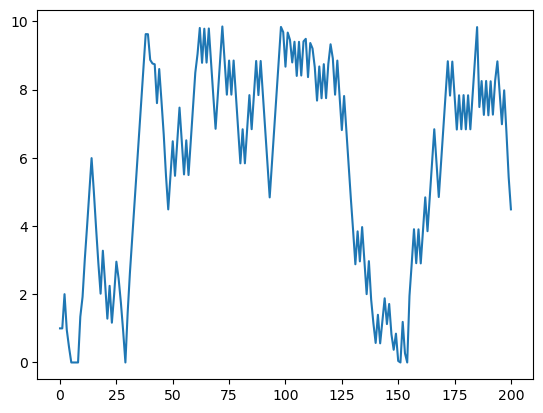

In [14]:
plt.plot(zz['DW1'])